In [1]:
import pandas as pd
import torch
import os
import sys
import librosa
import numpy as np
import matplotlib.pyplot as plt

sys.path.append('../audio_preprocessing')
sys.path.append('../src')
sys.path.append('../model_training_utils')

import preprocessing_func
from generator_to_dataset import NormalisedDataSet, NonNormalisedTestModelsDataSet
from gdsc_utils import PROJECT_DIR
import model_training

os.chdir(PROJECT_DIR)

In [2]:
df = pd.read_csv('data/metadata.csv')
df_train = df[df["subset"] == "train"]
df_val = df[df["subset"] == "validation"]
df_train.head()

,file_name,unique_file,path,species,label,subset,sample_rate,num_frames,length
0,Roeselianaroeselii_XC751814-dat028-019_edit1.wav,Roeselianaroeselii_XC751814-dat028-019,data/train/Roeselianaroeselii_XC751814-dat028-...,Roeselianaroeselii,56,train,44100,4586400,104.000000
1,Roeselianaroeselii_XC752367-dat006-010.wav,Roeselianaroeselii_XC752367-dat006-010,data/train/Roeselianaroeselii_XC752367-dat006-...,Roeselianaroeselii,56,train,44100,337571,7.654671
2,Yoyettacelis_GBIF2465208563_IN36000894_50988.wav,Yoyettacelis_GBIF2465208563_IN36000894_50988,data/train/Yoyettacelis_GBIF2465208563_IN36000...,Yoyettacelis,64,train,44100,220500,5.000000
3,Gomphocerippusrufus_XC752285-dat001-045.wav,Gomphocerippusrufus_XC752285-dat001-045,data/train/Gomphocerippusrufus_XC752285-dat001...,Gomphocerippusrufus,26,train,44100,693715,15.730499
5,Phaneropteranana_XC755717-221013-Phaneroptera-...,Phaneropteranana_XC755717-221013-Phaneroptera-...,data/train/Phaneropteranana_XC755717-221013-Ph...,Phaneropteranana,41,train,44100,88200,2.000000


In [3]:
paths, labels = ["data/train/Eumodicogryllusbordigalensis_XC752108-dat172-003_edit8.wav"], [2]

In [4]:
generator = preprocessing_func.non_normalised_data_generator_new(paths, labels)

In [5]:
graphs = []
for image, _ in generator:
    graphs.append(image)
    print(image.shape)

torch.Size([1, 128, 1034])


In [6]:
def plot_spectrogram(spec, title=None, ylabel='freq_bin', aspect='equal', xmax=None):
    fig, axs = plt.subplots(1, 1)
    axs.set_title(title or 'Spectrogram (db)')
    axs.set_ylabel(ylabel)
    axs.set_xlabel('frame')
    im = axs.imshow(spec, origin='lower', aspect=aspect)
    if xmax:
        axs.set_xlim((0, xmax))
    fig.colorbar(im, ax=axs)
    plt.show(block=False)

In [7]:
test_image = graphs[0]

In [8]:
test_image

tensor([[[-0.6872, -0.5218, -0.4376,  ..., -2.8603, -2.8603, -2.8603],
         [-0.6451, -0.5408, -0.5245,  ..., -2.8603, -2.8603, -2.8603],
         [-0.8739, -0.9175, -1.0361,  ..., -2.8603, -2.8603, -2.8603],
         ...,
         [-2.5871, -2.4441, -2.4042,  ..., -2.9412, -2.9412, -2.9412],
         [-2.5183, -2.4251, -2.4077,  ..., -2.9400, -2.9400, -2.9400],
         [-2.4026, -2.3310, -2.3369,  ..., -2.9385, -2.9385, -2.9385]]])

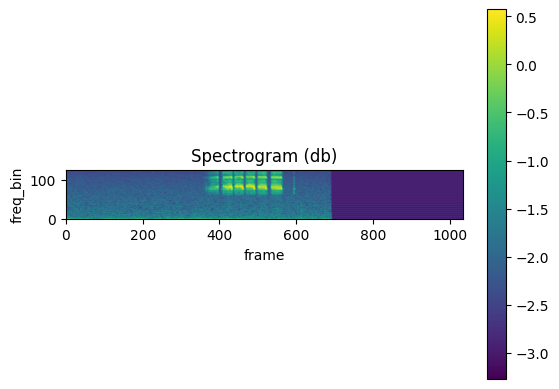

In [9]:
plot_spectrogram(test_image[0])

In [10]:
import torchvision

reshape_fn = torchvision.transforms.Resize(size=(64,256), antialias=False)

In [11]:
test_image_reshaped = reshape_fn(test_image)

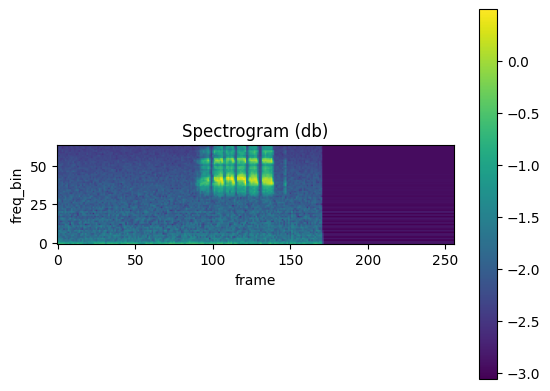

In [12]:
plot_spectrogram(test_image_reshaped[0])

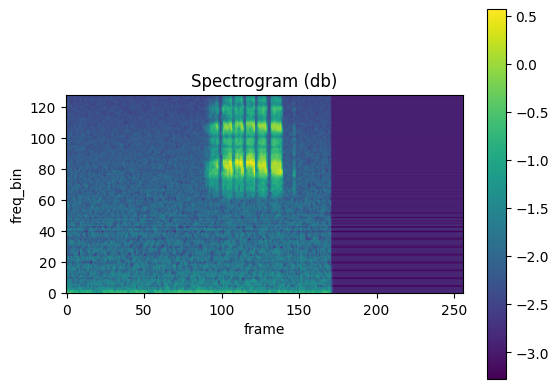

In [14]:
reshape_fn_2 = torchvision.transforms.Resize(size=(128,256), antialias=False)
test_image_reshaped_2 = reshape_fn_2(test_image)
plot_spectrogram(test_image_reshaped_2[0])